In [1]:
import pandas as pd

# Load your CSV file
file_path = 'amazon_review.csv'  # using file path locally
data = pd.read_csv(file_path)

# Check the first few rows of your data to understand its structure
print(data.head())


       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.      4.0   
1  Purchased this for my device, it worked as adv...      5.0   
2  it works as expected. I should have sprung for...      4.0   
3  This think has worked out great.Had a diff. br...      5.0   
4  Bought it with Retail Packaging, arrived legit...      5.0   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               nothing to really say....      1356220800  

In [2]:
from collections import Counter
import re

# Assuming the reviews are in a column called 'reviewText'
text_data = data['reviewText'].astype(str)

# Tokenize and clean the text
all_words = ' '.join(text_data).lower()
all_words = re.findall(r'\b\w+\b', all_words)

# Get word frequency
word_freq = Counter(all_words)

# Display the 10 most common words
print(word_freq.most_common(10))


[('i', 9365), ('the', 9223), ('it', 7677), ('and', 7631), ('to', 6163), ('a', 5612), ('my', 5081), ('card', 4718), ('this', 4565), ('for', 4053)]


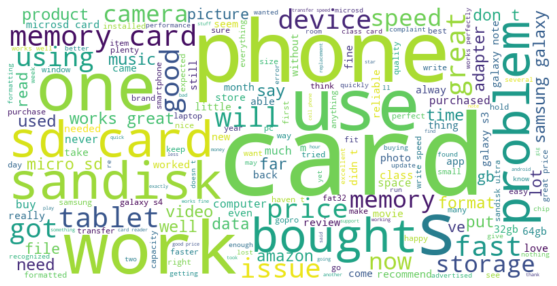

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


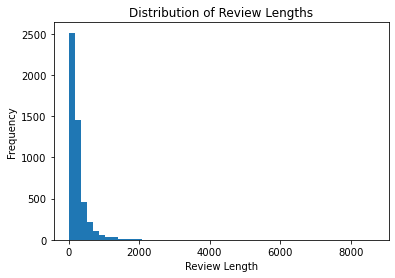

In [4]:
# Calculate the length of each review
data['review_length'] = data['reviewText'].astype(str).apply(len)

# Plot a histogram of review lengths
data['review_length'].plot(kind='hist', bins=50, title='Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()
